In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.style.use("ggplot")
import seaborn as sns
import datetime as dt
import os

#df.columns = ["用戶ID", "事件種類", "訊息種類", "訊息內容", "訊息ID", "時間戳記", "用戶名稱", "用戶圖片網址", "狀態訊息", "時間"]
df = pd.read_csv("20210529.csv")
time_df = df.copy()
time_df.index = pd.DatetimeIndex(df["time"])
time_df

output_path = ".\\result\\"
if not os.path.exists(output_path):
    os.mkdir(output_path)

In [2]:
time_df["day"] = time_df.index.day
time_df.head()

,userid,event_type,message_type,message_text,message_id,timestamp,display_name,picture_url,status_message,time,day
time,,,,,,,,,,,
2021-05-28 22:25:59,Ueafe5d8b223abe09cb614c965b041526,message,text,寇仲說道：可「上傳個人照片」辨識明星臉；輸入「recall」，可回到「大唐梁都」；輸入「cl...,1.413035e+13,1622211959008,Babym LIN,https://sprofile.line-scdn.net/0hzARTTFHrJW5_L...,NaN,2021-05-28 22:25:59,28
2021-05-28 22:25:50,Ueafe5d8b223abe09cb614c965b041526,message,text,welcome,1.413035e+13,1622211950610,Babym LIN,https://sprofile.line-scdn.net/0hzARTTFHrJW5_L...,NaN,2021-05-28 22:25:50,28
2021-05-28 11:57:31,Ueafe5d8b223abe09cb614c965b041526,message,text,前往「BABYM府」,1.412716e+13,1622174251084,Babym LIN,https://sprofile.line-scdn.net/0hzARTTFHrJW5_L...,NaN,2021-05-28 11:57:31,28
2021-05-28 10:17:13,Ueafe5d8b223abe09cb614c965b041526,message,image,NaN,1.412668e+13,1622168233627,Babym LIN,https://sprofile.line-scdn.net/0hzARTTFHrJW5_L...,NaN,2021-05-28 10:17:13,28
2021-05-28 10:16:47,Ueafe5d8b223abe09cb614c965b041526,message,image,NaN,1.412668e+13,1622168207678,Babym LIN,https://sprofile.line-scdn.net/0hzARTTFHrJW5_L...,NaN,2021-05-28 10:16:47,28


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   userid          451 non-null    object 
 1   event_type      451 non-null    object 
 2   message_type    421 non-null    object 
 3   message_text    342 non-null    object 
 4   message_id      421 non-null    float64
 5   timestamp       451 non-null    int64  
 6   display_name    451 non-null    object 
 7   picture_url     451 non-null    object 
 8   status_message  56 non-null     object 
 9   time            451 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 35.4+ KB


In [4]:
df.isnull().sum()

userid              0
event_type          0
message_type       30
message_text      109
message_id         30
timestamp           0
display_name        0
picture_url         0
status_message    395
time                0
dtype: int64

In [5]:
df[df.message_type.isnull()].event_type.value_counts()

postback    17
follow      11
unfollow     2
Name: event_type, dtype: int64

In [6]:
df[df.message_text.isnull()].message_type.value_counts()

image      90
audio       4
sticker     2
Name: message_type, dtype: int64

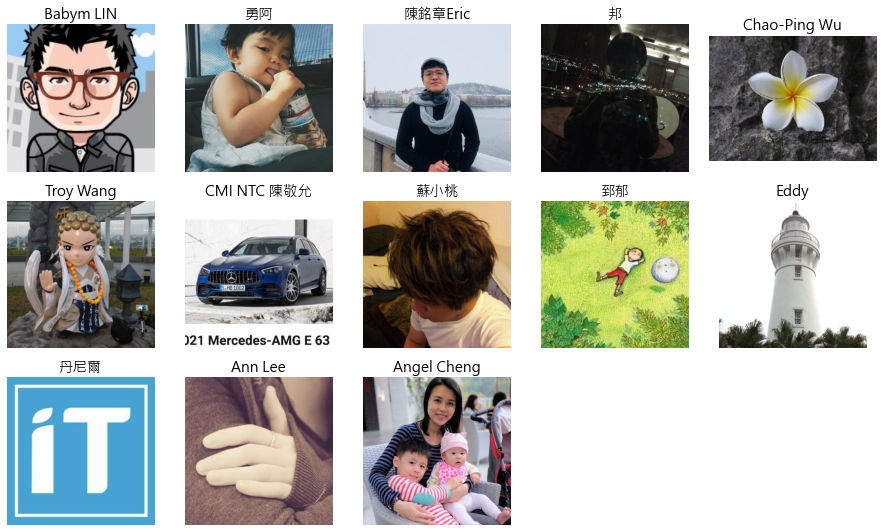

In [7]:
# 將用戶ID與個人圖片繪製成圖片
from PIL import Image
import requests
import warnings
warnings.filterwarnings("ignore")
w = 5
h = len(df["picture_url"].unique())//w + 1
r = 2.5
plt.figure(figsize=(w*r,h*r))
for i, url in enumerate(df["picture_url"].unique()):
    img = Image.open(requests.get(url, stream=True).raw)
    plt.subplot(h, w, i+1)
    plt.title(df["display_name"].unique()[i])
    plt.axis("off")
    plt.imshow(img)
plt.tight_layout()
plt.savefig(output_path+"user_pic.png")

In [8]:
event_type_count_by_user = pd.DataFrame(df.groupby("display_name").event_type.value_counts())
event_type_count_by_user.index.names = ["用戶", "事件種類"]
event_type_count_by_user.columns = (["事件次數"])
event_type_count_by_user.columns.names = ["by"]
event_type_count_by_user

by                     事件次數
用戶           事件種類          
Angel Cheng  message     38
             postback     3
Ann Lee      message     12
             follow       1
Babym LIN    message    319
             postback    11
             follow       2
             unfollow     2
CMI NTC 陳敬允  follow       1
Chao-Ping Wu follow       1
Eddy         follow       1
Troy Wang    follow       1
丹尼爾          follow       1
勇阿           message     33
             postback     3
             follow       1
蘇小桃          message     11
             follow       1
邦            message      6
郅郁           follow       1
陳銘章Eric      message      2

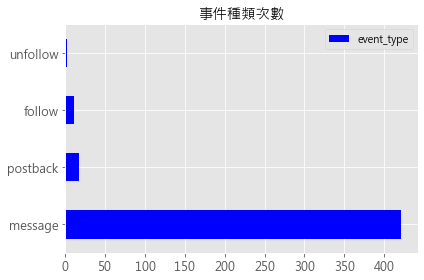

In [9]:
event_type_count_by_user = pd.DataFrame(df["event_type"].value_counts())
event_type_count_by_user.plot.barh(fontsize=12, colormap="winter")
plt.title("事件種類次數")
plt.tight_layout()
plt.savefig(output_path+"event_type_count_by_user.png")

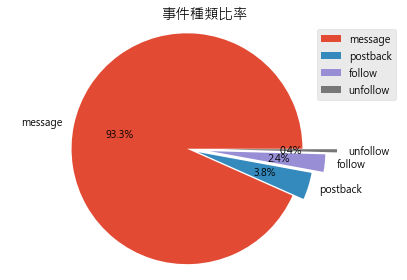

In [10]:
event_type_count_by_user.plot.pie(subplots=True,
                                #colormap="rainbow",
                                autopct='%1.1f%%',
                                explode=(0,.1,.2,.3),
                               )
plt.title("事件種類比率")
plt.axis('equal')
plt.tight_layout()
plt.ylabel(None)
plt.savefig(output_path+"event_type_count_pie.png")

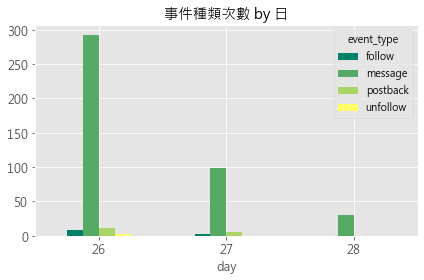

In [11]:
event_type_count_by_day = time_df.groupby("day").event_type.value_counts()
event_type_count_by_day.unstack().plot.bar(fontsize=12, colormap="summer")
plt.title("事件種類次數 by 日")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(output_path+"event_type_count_by_day.png")

In [20]:
message_type_count_by_user = pd.DataFrame(df.groupby("display_name").message_type.value_counts())
message_type_count_by_user.index.names = ["用戶", "訊息種類"]
message_type_count_by_user.columns = (["訊息次數"])
message_type_count_by_user.columns.names = ["by"]
message_type_count_by_user

by                   訊息次數
用戶          訊息種類         
Angel Cheng text       34
            image       3
            sticker     1
Ann Lee     image       8
            text        4
Babym LIN   text      238
            image      76
            audio       4
            sticker     1
勇阿          text       30
            image       3
蘇小桃         text       11
邦           text        6
陳銘章Eric     text        2

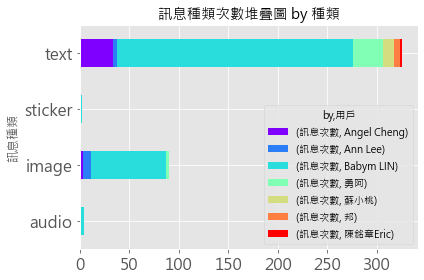

In [17]:
message_type_count_by_user.unstack(0).plot.barh(stacked=True, fontsize=16, colormap="rainbow")
plt.title("訊息種類次數堆疊圖 by 種類")
plt.tight_layout()
plt.savefig(output_path+"message_type_count_by_type.png")

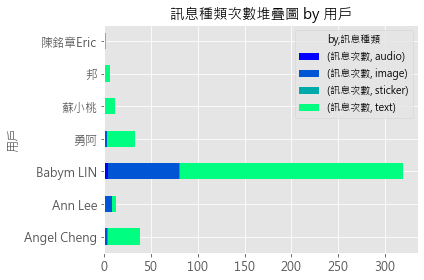

In [14]:
message_type_count_by_user.unstack(1).plot.barh(stacked=True, fontsize=12, colormap="winter")
plt.title("訊息種類次數堆疊圖 by 用戶")
plt.tight_layout()
plt.savefig(output_path+"message_type_count_by_user.png")

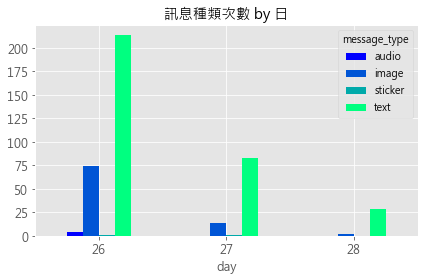

In [15]:
message_type_count_by_day = time_df.groupby("day").message_type.value_counts()
message_type_count_by_day.unstack().plot.bar(fontsize=12, colormap="winter")
plt.title("訊息種類次數 by 日")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(output_path+"message_type_count_by_day.png")